### Programa para graficar el histograma de $S/N$

Importamos los paquetes que vamos a usar

In [ ]:
import pypulse as pulsar
import astropy
from astropy import stats

import matplotlib.mlab as mlab
import matplotlib as mpl
import matplotlib.pyplot as plt     # para graficar
from matplotlib import pyplot

from scipy.optimize import curve_fit

import math
import decimal
import numpy as np
import glob                         # para hacer listas de archivo
import subprocess                   # para usar subprocesos

import pandas as pd

import os
import shutil

Cargamos los datos de las observaciones

In [2]:
data = "results_total.txt"
files = np.loadtxt( data , skiprows=0 , dtype=str , usecols=(0) )
sn_obs = np.loadtxt( data , skiprows=0 , dtype=str , usecols=(1) )
t_obs = np.loadtxt( data , skiprows=0 , dtype=str , usecols=(2) )

sn_A1 = []
sn_A2 = []
tobs_A1 = []
tobs_A2 = []

# creamos una lista con todos los archivos .pfd de observaciones

os.chdir('./pfds/')                         # entramos al directorio que contiene los .pfds
pfd_files = glob.glob('*pfd')                           # lista de archivos .pfd
print("Numero de observaciones = " + str(len(pfd_files)))

# clasificamos a las observaciones según su antena

A1 = 0
A2 = 0
for pfd in pfd_files:
    
    if pfd.startswith( 'prepfold_timing_A1' ):
        A1 += 1
        sn_A1.append(float(sn_obs[ np.where(files == pfd)[0][0] ]))
        tobs_A1.append(float(t_obs[ np.where(files == pfd)[0][0] ]))
        
    elif pfd.startswith( 'prepfold_timing_A2'):
        A2 += 1
        sn_A2.append(float(sn_obs[ np.where(files == pfd)[0][0] ]))
        tobs_A2.append(float(t_obs[ np.where(files == pfd)[0][0] ])               )
        
    else:
        print("error")   
        
os.chdir('..')

print("Observaciones con A1 = " + str(A1))
print("Observaciones con A2 = " + str(A2))

403
Numero de observaciones = 403
184
219


Graficamos

bin width A1 = 34.56260141753833
bin width A2 = 30.23180955978889
bin width = 30.23180955978889


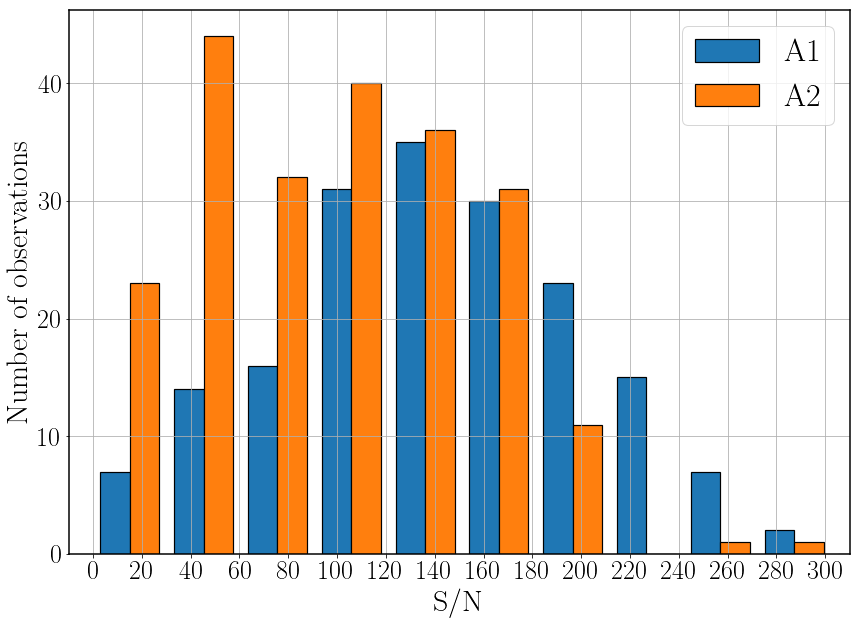

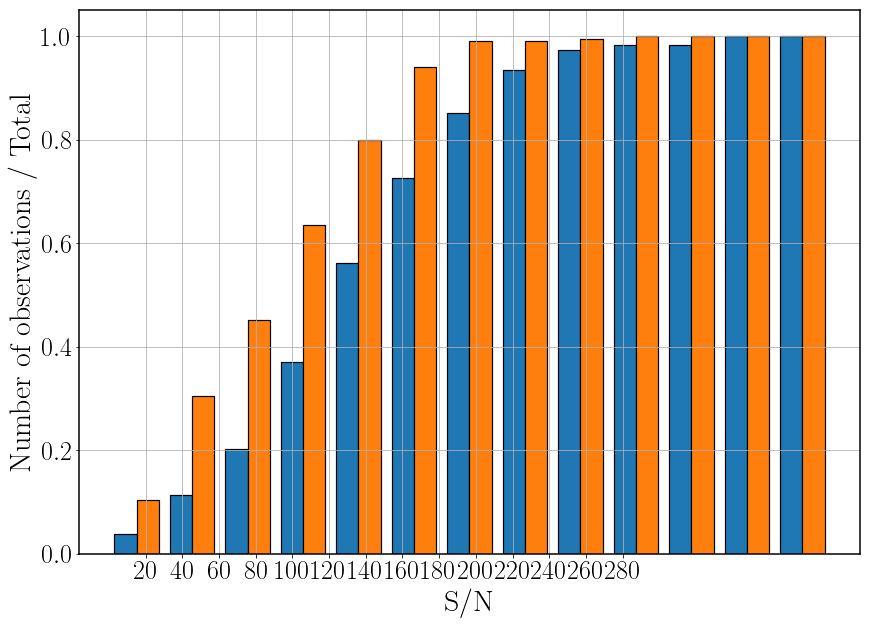

In [17]:
plt.close()

# Set the fonts. Always use big fonts.
nice_fonts = {
        # Use LaTeX to write all text
        "text.usetex": True,
        "font.family": "serif",
        # Use 10pt font in plots, to match 10pt font in document
        "axes.labelsize": 30,
        "font.size": 28,
        "axes.linewidth": 1.5,
        # Make the legend/label fonts a little smaller
        "legend.fontsize": 32,
        "xtick.labelsize": 26,
        "ytick.labelsize": 26,
}
# Update the fonts
mpl.rcParams.update(nice_fonts)


plt.figure(figsize=(14,10))
plt.grid()
    
bin_width_A1 = astropy.stats.knuth_bin_width(sn_A1,return_bins=False, quiet=True)
bin_width_A2 = astropy.stats.knuth_bin_width(sn_A2,return_bins=False, quiet=True)
bin_width = np.amin([bin_width_A1, bin_width_A2])
print("bin width A1 = " + str(bin_width_A1))
print("bin width A2 = " + str(bin_width_A2))
print("bin width usado = " + str(bin_width))
bins = np.arange(0, 400 , bin_width)

plt.hist([sn_A1,sn_A2], bins, edgecolor='black', linewidth=1.2, label=['A1','A2'])
plt.legend(loc='upper right')

plt.xlim(-10,310)
plt.xticks(np.arange(0, 320 , 20))
plt.xlabel('S/N')
plt.ylabel('Number of observations')
plt.savefig('histograma_total.pdf', bbox_inches='tight')
plt.savefig('histograma_total.png', bbox_inches='tight')
plt.show()

plt.close()

fig, ax = plt.subplots(figsize=(14,10))
ax.grid(True)
ax.set_xlabel('S/N')
ax.set_ylabel('Number of observations / Total')

ax.hist([sn_A1,sn_A2], bins, normed=True , edgecolor='black', linewidth=1.2, cumulative=1, label=['A1','A2'])
plt.setp(ax, xticks=np.arange(20, 300, 20))

plt.savefig('histograma_total_cumulative.pdf', bbox_inches='tight')
plt.savefig('histograma_total_cumulative.png', bbox_inches='tight')
plt.show()
